<a href="https://colab.research.google.com/github/YagyanshB/machine-learning-/blob/main/basic_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libraries:

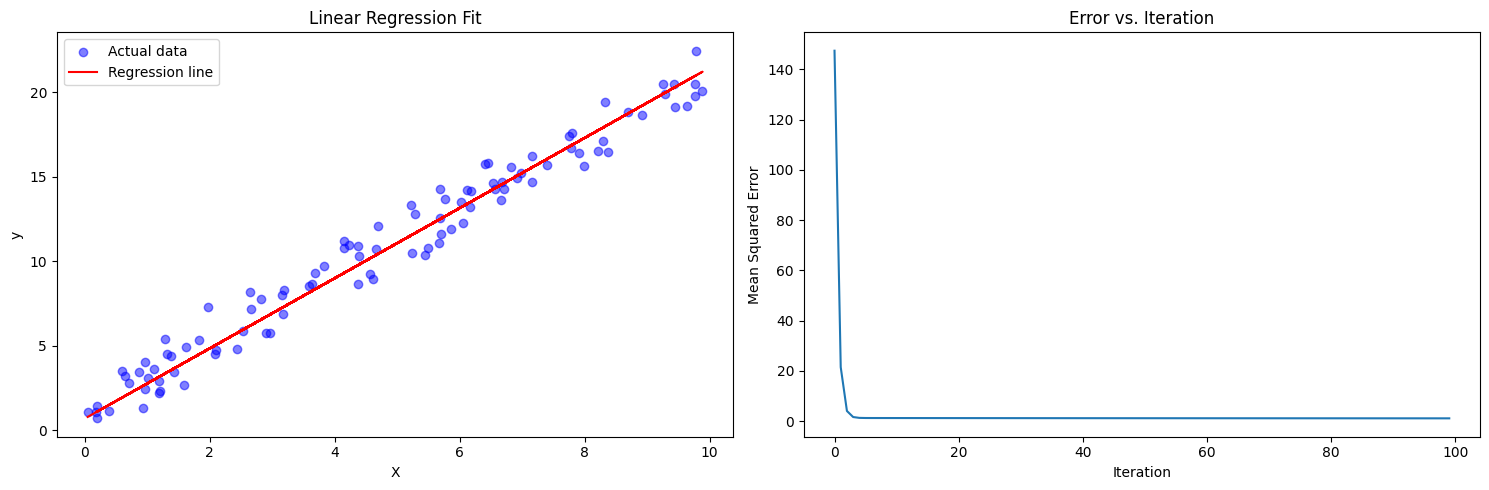

Final weights: 2.08
Final bias: 0.70
X = 2.0 -> Predicted y = 4.85
X = 5.0 -> Predicted y = 11.07
X = 8.0 -> Predicted y = 17.30


In [23]:
import numpy as np
import matplotlib.pyplot as plt

class SimpleLinearRegression:
    def __init__(self, learning_rate=0.01, iterations=1000):
        """
        Initialize linear regression model

        Parameters:
        learning_rate: How fast to learn (smaller = slower but more precise)
        iterations: How many times to train on the data
        """
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.weights = None
        self.bias = None
        # For tracking progress
        self.error_history = []

    def fit(self, X, y):
        """Train the model on data"""

        # Initialize parameters to zero
        self.weights = 0
        self.bias = 0

        # Training loop
        for _ in range(self.iterations):
            # Make predictions with current parameters
            y_pred = self.weights * X + self.bias

            # Calculate error (MSE)
            error = np.mean((y - y_pred) ** 2)
            self.error_history.append(error)

            # Calculate gradients
            dw = -(2/len(X)) * np.sum(X * (y - y_pred))
            db = -(2/len(X)) * np.sum(y - y_pred)

            # Update parameters
            self.weights = self.weights - self.learning_rate * dw
            self.bias = self.bias - self.learning_rate * db

    def predict(self, X):
        """Make predictions for new data"""
        return self.weights * X + self.bias

    def plot_error_history(self):
        """Plot how error decreased during training"""
        plt.plot(self.error_history)
        plt.title('Error vs. Iteration')
        plt.xlabel('Iteration')
        plt.ylabel('Mean Squared Error')
        plt.show()

# Example usage:
if __name__ == "__main__":
    # Generate sample data
    np.random.seed(0)
    X = np.random.uniform(0, 10, 100)  # 100 random x values between 0 and 10
    y = 2 * X + 1 + np.random.normal(0, 1, 100)  # y = 2x + 1 + noise

    # Create and train model
    model = SimpleLinearRegression(learning_rate=0.01, iterations=100)
    model.fit(X, y)

    # Make predictions
    y_pred = model.predict(X)

    # Plot results
    plt.figure(figsize=(15, 5))

    # Plot 1: Data and regression line
    plt.subplot(1, 2, 1)
    plt.scatter(X, y, color='blue', alpha=0.5, label='Actual data')
    plt.plot(X, y_pred, color='red', label='Regression line')
    plt.xlabel('X')
    plt.ylabel('y')
    plt.title('Linear Regression Fit')
    plt.legend()

    # Plot 2: Error history
    plt.subplot(1, 2, 2)
    plt.plot(model.error_history)
    plt.xlabel('Iteration')
    plt.ylabel('Mean Squared Error')
    plt.title('Error vs. Iteration')

    plt.tight_layout()
    plt.show()

    # Print final parameters
    print(f"Final weights: {model.weights:.2f}")
    print(f"Final bias: {model.bias:.2f}")

    # Make some predictions
    test_points = np.array([2, 5, 8])
    predictions = model.predict(test_points)
    for x, pred in zip(test_points, predictions):
        print(f"X = {x:.1f} -> Predicted y = {pred:.2f}")